# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/bus.png?raw=true" width=800, align="left"/>

- 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
- 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
- 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# [미션 1] 구별 버스정류장 분석

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [3]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [6]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [9]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [123]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
import seaborn as sns

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### 기본 데이터: 1.1 bus_station_boarding_month_202408.csv
- 서울시 버스노선별 정류장별 승하차 인원 정보
- 출처: https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do

### 추가 데이터: 1.1 bus_station_202408.xlsx
- 서울시 버스정류장 위치정보
- 출처: https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1. 데이터 불러오기

- 분석 대상 데이터를 불러와 데이터프레임으로 선언합니다.

### [참고] 데이터 프레임을 불러오고 변수로 저장(CSV 기준으로 진행)

- csv: pd.read_csv('파일이름.csv')
- txt: pd.read_csv('파일이름.csv', sep='구분자')
- xlsx: pd.read_excel('파일이름.xlsx')
- pickle: pd.read_pickle('파일이름.pkl')

## [실습1] 데이터 불러오기

- 대상 파일: 1.1 bus_station_boarding_month_202408.csv
- 불러온 데이터는 bus_station 데이터프레임으로 선언하세요.
- 데이터 불러올 때 참고할 사항
    - 구분자(sep)는 ',' 입니다
    - CP949 인코더를 사용해 주세요
- 가상 정류장은 '버스정류장ARS번호' 열 값이 '~'로 저정되어 있습니다.
- 가상 정류장은 버스정보시스템 상에서 위치 정보를 표시하기 위해 임의로 설정한 것이며, 실제하지 않습니다.
- 그러므로 가상 정류장 행은 삭제합니다.

In [17]:
# 데이터 불러오기
bus_station = pd.read_csv(path + '1.1 bus_station_boarding_month_202408.csv', sep=',', encoding='CP949')

# 가상 정류장 삭제
del_rows = list(bus_station[bus_station['버스정류장ARS번호'] == '~'].index)
bus_station.drop(del_rows, axis=0, inplace=True)

# 확인
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240801,100,100번(하계동~용산구청),01002,창경궁.서울대학교병원(00031),123,134,20240804
1,20240801,7728,7728번(대화동~신촌),19702,DMC두산위브더퍼스트(00038),217,45,20240804
2,20240801,7728,7728번(대화동~신촌),19701,DMC두산위브더퍼스트(00071),22,148,20240804
3,20240801,7728,7728번(대화동~신촌),13259,현대백화점(00056),125,78,20240804
4,20240801,7728,7728번(대화동~신촌),13147,연희동대우아파트(00058),118,33,20240804


In [18]:
# 데이터프레임 크기(행, 열) 확인
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240801,100,100번(하계동~용산구청),01002,창경궁.서울대학교병원(00031),123,134,20240804
1,20240801,7728,7728번(대화동~신촌),19702,DMC두산위브더퍼스트(00038),217,45,20240804
2,20240801,7728,7728번(대화동~신촌),19701,DMC두산위브더퍼스트(00071),22,148,20240804
3,20240801,7728,7728번(대화동~신촌),13259,현대백화점(00056),125,78,20240804
4,20240801,7728,7728번(대화동~신촌),13147,연희동대우아파트(00058),118,33,20240804
...,...,...,...,...,...,...,...,...
1170229,20240831,3422,3422번(장지공영차고지~한티역),24010,가락시장.가락시장역(00068),29,116,20240903
1170230,20240831,753,753번(구산동~상도동),13002,북가좌동삼거리(00084),73,40,20240903
1170231,20240831,성북13,성북13(동방주택~석계역),08451,동방주택(00028),31,56,20240903
1170232,20240831,3422,3422번(장지공영차고지~한티역),24011,문정로데오거리입구(00025),33,42,20240903


---

# 2. 기본 정보 확인 및 전처리

- 분석 대상 테이터를 탐색하고 적절한 전처리를 수행합니다.

## [실습2] 기본 정보 확인

- bus_station 데이터프레임 정보를 확인하세요.
- head(), tail(), info(), describe() 메서드 등을 활용해 보세요.

In [22]:
# head() 메서드로 상위 데이터 확인
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240801,100,100번(하계동~용산구청),01002,창경궁.서울대학교병원(00031),123,134,20240804
1,20240801,7728,7728번(대화동~신촌),19702,DMC두산위브더퍼스트(00038),217,45,20240804
2,20240801,7728,7728번(대화동~신촌),19701,DMC두산위브더퍼스트(00071),22,148,20240804
3,20240801,7728,7728번(대화동~신촌),13259,현대백화점(00056),125,78,20240804
4,20240801,7728,7728번(대화동~신촌),13147,연희동대우아파트(00058),118,33,20240804


In [23]:
# tail() 메서드로 하위 데이터 확인
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1170229,20240831,3422,3422번(장지공영차고지~한티역),24010,가락시장.가락시장역(00068),29,116,20240903
1170230,20240831,753,753번(구산동~상도동),13002,북가좌동삼거리(00084),73,40,20240903
1170231,20240831,성북13,성북13(동방주택~석계역),08451,동방주택(00028),31,56,20240903
1170232,20240831,3422,3422번(장지공영차고지~한티역),24011,문정로데오거리입구(00025),33,42,20240903
1170233,20240831,107,107번(민락동차고지~종로5가),08269,세아.보광.건영아파트앞(00102),39,108,20240903


In [24]:
# info() 메서드로 열 이름, 데이터 개수, 데이터 형식 등 확인
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1165104 entries, 0 to 1170233
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1165104 non-null  int64 
 1   노선번호        1165104 non-null  object
 2   노선명         1165104 non-null  object
 3   버스정류장ARS번호  1165104 non-null  object
 4   역명          1165104 non-null  object
 5   승차총승객수      1165104 non-null  int64 
 6   하차총승객수      1165104 non-null  int64 
 7   등록일자        1165104 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 80.0+ MB


In [25]:
# 표시 형식 변경
pd.set_option('display.float_format', '{:.4f}'.format)

In [26]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240801,100,100번(하계동~용산구청),01002,창경궁.서울대학교병원(00031),123,134,20240804
1,20240801,7728,7728번(대화동~신촌),19702,DMC두산위브더퍼스트(00038),217,45,20240804
2,20240801,7728,7728번(대화동~신촌),19701,DMC두산위브더퍼스트(00071),22,148,20240804
3,20240801,7728,7728번(대화동~신촌),13259,현대백화점(00056),125,78,20240804
4,20240801,7728,7728번(대화동~신촌),13147,연희동대우아파트(00058),118,33,20240804


In [27]:
# describe() 메서드로 기술통계정보 확인
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1165104.0000,1165104.0000,1165104.0000,1165104.0000
mean,20240816.0110,116.5005,114.2709,20240825.7067
std,8.9479,159.1275,144.4570,26.1626
min,20240801.0000,0.0000,0.0000,20240804.0000
25%,20240808.0000,18.0000,21.0000,20240811.0000
50%,20240816.0000,69.0000,74.0000,20240819.0000
75%,20240824.0000,156.0000,155.0000,20240827.0000
max,20240831.0000,4494.0000,3496.0000,20240903.0000


In [28]:
# 표시 형식 초기화
pd.reset_option('display.float_format')

## [실습3] 버스정류장 위치를 구별로 구분

- '버스정류장ARS번호' 열의 값 앞 2자리가 구를 의미합니다.(예:  '01002'의 앞 2자리 '01')
- '버스정류장ARS번호' 열의 값 앞 2자리를 갖는 '자치구' 열을 추가하세요.
- 참고로, 자치구는 각 정류장이 위치한 구 이름입니다.

In [30]:
# '버스정류장ARS번호' 열 확인
bus_station[['버스정류장ARS번호']]

,버스정류장ARS번호
0,01002
1,19702
2,19701
3,13259
4,13147
...,...
1170229,24010
1170230,13002
1170231,08451
1170232,24011


In [31]:
# '자치구' 열 추가
# 참고: df['새열'] = df['기존열'].str[m:n] 형태로 슬라이싱
bus_station['자치구']=bus_station['버스정류장ARS번호'].str[0:2]

# 확인
bus_station[['자치구','버스정류장ARS번호']]

,자치구,버스정류장ARS번호
0,01,01002
1,19,19702
2,19,19701
3,13,13259
4,13,13147
...,...,...
1170229,24,24010
1170230,13,13002
1170231,08,08451
1170232,24,24011


**[참고] 버스정류장 ARS 번호: 01~25까지 앞 숫자 두개가 위치한 구를 의미**

~~~
01. 종로구  02. 중구    03. 용산구  04. 성동구  05. 광진구    06. 동대문구  07. 중랑구
08. 성북구  09. 강북구  10. 도봉구  11. 노원구  12. 은평구    13. 서대문구  14. 마포구
15. 양천구  16. 강서구  17. 구로구  18. 금천구  19. 영등포구  20. 동작구    21. 관악구
22. 서초구  23. 강남구  24. 송파구  25. 강동구
~~~

- 다음 코드를 필히 실행하여 구 코드를 구 이름으로 변경하세요.

In [34]:
# 구 코드를 구 이름으로 변경
bus_station['자치구'] = bus_station['자치구'].map({
    '01': '종로구', '02': '중구',   '03': '용산구', '04': '성동구', '05': '광진구',   '06': '동대문구', '07': '중랑구',
    '08': '성북구', '09': '강북구', '10': '도봉구', '11': '노원구', '12': '은평구',   '13': '서대문구', '14': '마포구',
    '15': '양천구', '16': '강서구', '17': '구로구', '18': '금천구', '19': '영등포구', '20': '동작구',   '21': '관악구',
    '22': '서초구', '23': '강남구', '24': '송파구', '25': '강동구'})

# '버스정류장ARS번호' 열 데이터 형식 변경
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(int)

# 확인
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20240801,100,100번(하계동~용산구청),1002,창경궁.서울대학교병원(00031),123,134,20240804,종로구
1,20240801,7728,7728번(대화동~신촌),19702,DMC두산위브더퍼스트(00038),217,45,20240804,영등포구
2,20240801,7728,7728번(대화동~신촌),19701,DMC두산위브더퍼스트(00071),22,148,20240804,영등포구
3,20240801,7728,7728번(대화동~신촌),13259,현대백화점(00056),125,78,20240804,서대문구
4,20240801,7728,7728번(대화동~신촌),13147,연희동대우아파트(00058),118,33,20240804,서대문구


## [실습4] 서울지역 데이터 준비

- bus_station 데이터프레임에는 서울 지역 외의 버스정류장이 포함되어 있습니다.
- 예를 들어 다음과 같이 '버스정류장ARS번호' 열 값이 7674 인 행을 검색하면 조회가 됩니다.
- 하지만 네이버 지도에서 7674번 버스 정류장을 검색해 보세요. 이 정류장은 서울 지역이 아닙니다.

In [36]:
# 7674 번 정류장 검색
bus_station.loc[bus_station['버스정류장ARS번호'] == 7674].head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
190830,20240806,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,0,20240809,중랑구
304889,20240809,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,0,20240812,중랑구
342468,20240810,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,2,20240813,중랑구
417226,20240812,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),2,0,20240815,중랑구
568426,20240816,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240819,중랑구


- 1.1 bus_station_202408.xlsx 엑셀 파일에 서울지역 만의 정류장 정보가 포함되어 있습니다.
- 파일을 읽어와 only_seoul 데이터프레임으로 선언하세요.

In [38]:
# 서울 버스 정류장 데이터 불러오기
# 참고: read_excel() 메서드 사용
only_seoul = pd.read_excel(path +'1.1 bus_station_202408.xlsx')

# 확인
only_seoul.head()

,ARS_ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


- only_seoul 데이터프레임의 'ARS-ID' 열 이름을 '버스정류장ARS번호'로 변경하세요.

In [40]:
# 열 이름 변경: 'ARS-ID ' --> '버스정류장ARS번호'
only_seoul.rename(columns={'ARS_ID':'버스정류장ARS번호'},inplace=True)
# 참고: rename() 메서드 사용


# 확인
only_seoul.head()

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


- only_seoul, bus_station 두 데이터프레임을 조인(merge)하세요.
- 조인 결과를 tmp 데이터프레임으로 선언하세요.

In [42]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20240801,100,100번(하계동~용산구청),1002,창경궁.서울대학교병원(00031),123,134,20240804,종로구
1,20240801,7728,7728번(대화동~신촌),19702,DMC두산위브더퍼스트(00038),217,45,20240804,영등포구
2,20240801,7728,7728번(대화동~신촌),19701,DMC두산위브더퍼스트(00071),22,148,20240804,영등포구
3,20240801,7728,7728번(대화동~신촌),13259,현대백화점(00056),125,78,20240804,서대문구
4,20240801,7728,7728번(대화동~신촌),13147,연희동대우아파트(00058),118,33,20240804,서대문구


In [43]:
only_seoul.head()

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [44]:
# only_seoul, bus_station 데이터프레임 조인
# 참고: '버스정류장ARS번호' 열이 조인 기준, how='inner' 지정
tmp = pd.merge(only_seoul,bus_station,how='inner',on='버스정류장ARS번호')

# 확인
tmp

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20240801,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),15,26,20240804,종로구
1,1001,종로2가사거리,20240801,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리(00089),13,11,20240804,종로구
2,1001,종로2가사거리,20240801,470,470번(상암차고지~안골마을),종로2가사거리(00066),296,288,20240804,종로구
3,1001,종로2가사거리,20240801,741,741번(진관차고지~헌인릉입구),종로2가사거리(00075),259,293,20240804,종로구
4,1001,종로2가사거리,20240802,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),12,5,20240805,종로구
...,...,...,...,...,...,...,...,...,...,...
1161311,25990,암사삼성.현대아파트,20240827,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),109,37,20240830,강동구
1161312,25990,암사삼성.현대아파트,20240828,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),103,31,20240831,강동구
1161313,25990,암사삼성.현대아파트,20240829,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),102,43,20240901,강동구
1161314,25990,암사삼성.현대아파트,20240830,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),91,38,20240902,강동구


---
### <font color="red">[주의] </font> 실습5부터 실습8까지는 tmp 데이터프레임을 대상으로 집계를 수행합니다.
---

## [실습5] 구별 버스정류장 개수 확인

- 자치구별 '버스정류장ARS번호' 개수를 집계하세요.
- 집계 결과를 seoul_bus_station_ars 데이터프레임으로 선언하세요.

In [86]:
# 자치구별 '버스정류장ARS번호' 개수 집계 --> seoul_bus_station_ars 데이터프레임으로 선언
# 참고: groupby() 메서드 사용, as_index=False 지정, nunique() 집계
seoul_bus_station_ars = tmp.groupby('자치구',as_index=False)['버스정류장ARS번호'].nunique()

# 확인
seoul_bus_station_ars

,자치구,버스정류장ARS번호
0,강남구,502
1,강동구,376
2,강북구,410
3,강서구,565
4,관악구,465
5,광진구,278
6,구로구,478
7,금천구,344
8,노원구,495
9,도봉구,366


- '버스정류장ARS번호' 열 이름을 '정류장수' 로 변경하세요.

In [89]:
# 열 이름 변경: '버스정류장ARS번호' --> '정류장수'
# 참고: rename() 메서드 사용
seoul_bus_station_ars.rename(columns={'버스정류장ARS번호':'정류장수'},inplace=True)

# 확인
seoul_bus_station_ars


,자치구,정류장수
0,강남구,502
1,강동구,376
2,강북구,410
3,강서구,565
4,관악구,465
5,광진구,278
6,구로구,478
7,금천구,344
8,노원구,495
9,도봉구,366


## [실습6] 구별 버스노선 개수 확인

- 자치구별 '노선번호' 개수를 집계하세요.
- 집계 결과를 seoul_bus_station_line 데이터프레임으로 선언하세요.

In [92]:
# 자치구별 '노선번호' 개수 집계 --> seoul_bus_station_line 데이터프레임으로 선언
# 참고: groupby() 메서드 사용, as_index=False 지정, nunique() 집계
seoul_bus_station_line = tmp.groupby('자치구',as_index=False)['노선번호'].nunique()
# 확인seoul_bus_line
seoul_bus_station_line

,자치구,노선번호
0,강남구,99
1,강동구,24
2,강북구,71
3,강서구,54
4,관악구,82
5,광진구,43
6,구로구,81
7,금천구,56
8,노원구,61
9,도봉구,57


- '노선번호' 열 이름을 '노선수'로 변경하세요.

In [94]:
# 열 이름 변경: '노선번호' --> '노선수'
# 참고: rename() 메서드 사용

seoul_bus_station_line.columns=['자치구','노선수']
# 확인
seoul_bus_station_line

,자치구,노선수
0,강남구,99
1,강동구,24
2,강북구,71
3,강서구,54
4,관악구,82
5,광진구,43
6,구로구,81
7,금천구,56
8,노원구,61
9,도봉구,57


## [실습7] 구별 승차 총 승객수, 하차 총 승객수 구하기

- 자치구별 '승차총승객수', '하차총승객수' 합을 집계하세요.
- 집계 결과를 seoul_bus_station_sum 데이터프레임으로 선언하세요.

In [98]:
# 자치구별 '승차총승객수', '하차총승객수' 합 집계 --> seoul_bus_station_sum 데이터프레임으로 선언
# 참고: groupby() 메서드 사용, as_index=False 지정, sum() 집계
seoul_bus_station_sum = tmp.groupby('자치구',as_index=False)[['승차총승객수','하차총승객수']].sum()

# 확인
seoul_bus_station_sum

,자치구,승차총승객수,하차총승객수
0,강남구,9113021,8640353
1,강동구,3306588,3242901
2,강북구,5244436,5077041
3,강서구,5244615,5218001
4,관악구,7691243,7850254
5,광진구,3207725,3228754
6,구로구,5525646,5324566
7,금천구,3990114,3839246
8,노원구,4609496,4535591
9,도봉구,3575712,3493061


## [실습8] 구별 승차 평균 승객수, 하차 평균 승객수 구하기

- 자치구별 '승차총승객수', '하차총승객수' 평균을 집계하세요.
- 집계 결과를 seoul_bus_station_mean 데이터프레임으로 선언하세요.

In [101]:
# 자치구별 '승차총승객수', '하차총승객수' 평균 집계 --> seoul_bus_station_mean 데이터프레임으로 선언
# 참고: groupby() 메서드 사용, as_index=False 지정, mean() 집계
seoul_bus_station_mean = tmp.groupby('자치구',as_index=False)[['승차총승객수','하차총승객수']].mean()

# 확인
seoul_bus_station_mean

,자치구,승차총승객수,하차총승객수
0,강남구,135.163908,128.153318
1,강동구,94.638885,92.816079
2,강북구,138.244306,133.831743
3,강서구,93.106837,92.634362
4,관악구,147.777793,150.832994
5,광진구,118.756247,119.534782
6,구로구,125.119353,120.566221
7,금천구,129.954208,125.040581
8,노원구,88.736303,87.313576
9,도봉구,110.579911,108.023905


- 다음과 같이 seoul_bus_station_mean 데이터프레임의 열 이름을 변경하세요.
    - '승차총승객수' --> '승차평균승객수', '하차총승객수' --> '하차평균승객수'

In [111]:
# 열 이름 변경: '승차총승객수' --> '승차평균승객수', '하차총승객수' --> '하차평균승객수'
# 참고: rename() 메서드 사용
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'},inplace=True)

# 확인
seoul_bus_station_mean

,자치구,승차평균승객수,하차평균승객수
0,강남구,135.163908,128.153318
1,강동구,94.638885,92.816079
2,강북구,138.244306,133.831743
3,강서구,93.106837,92.634362
4,관악구,147.777793,150.832994
5,광진구,118.756247,119.534782
6,구로구,125.119353,120.566221
7,금천구,129.954208,125.040581
8,노원구,88.736303,87.313576
9,도봉구,110.579911,108.023905


## [실습9] 데이터 프레임 합치기

- 위 과정에서 만들어진 다음 4개 데이터프레임을 조인(merge)하세요.
    - seoul_bus_station_ars
    - seoul_bus_station_line
    - seoul_bus_station_sum
    - seoul_bus_station_mean
- 조인 결과를 seoul_bus_station 데이터프레임으로 선언하세요.

In [114]:
# 4개 데이터프레임 조인
# 참고: pd.merge() 함수를 3번 사용해야 함
# 참고: '자치구' 열이 조인 기준, how='inner' 지정
bus = pd.merge(seoul_bus_station_ars, seoul_bus_station_line, how='inner', on='자치구')
bus = pd.merge(bus, seoul_bus_station_sum, how='inner', on='자치구')
seoul_bus_station = pd.merge(bus, seoul_bus_station_mean, how='inner', on='자치구')

# 확인
seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


- 다음과 같이 seoul_bus_station 데이터프레임의 열 이름을 변경하세요
    - '버스정류장ARS번호' --> '정류장수', '노선번호' --> '노선수'

In [116]:
# 열 이름 변경: '버스정류장ARS번호' --> '정류장수', '노선번호' --> '노선수'
# 참고: rename() 메서드 사용


# 롹인
seoul_bus_station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994
5,광진구,278,43,3207725,3228754,118.756247,119.534782
6,구로구,478,81,5525646,5324566,125.119353,120.566221
7,금천구,344,56,3990114,3839246,129.954208,125.040581
8,노원구,495,61,4609496,4535591,88.736303,87.313576
9,도봉구,366,57,3575712,3493061,110.579911,108.023905


- seoul_bus_station 데이터프레임을 df_seoul_bus_station.csv 파일로 저장하세요.

In [118]:
# csv 파일로 데이터프레임 저장 (파일명: df_seoul_bus_station.csv)
# 참고: to_csv() 메서드를 사용, index=False 지정
seoul_bus_station.to_csv(path + 'df_seoul_bus_station.csv', index=False)

---

# 3. 데이터 분석

- 다양한 분석 과정을 통해 인사이트를 도출하세요.

## [실습10] 시각화 분석

- 다양한 열를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

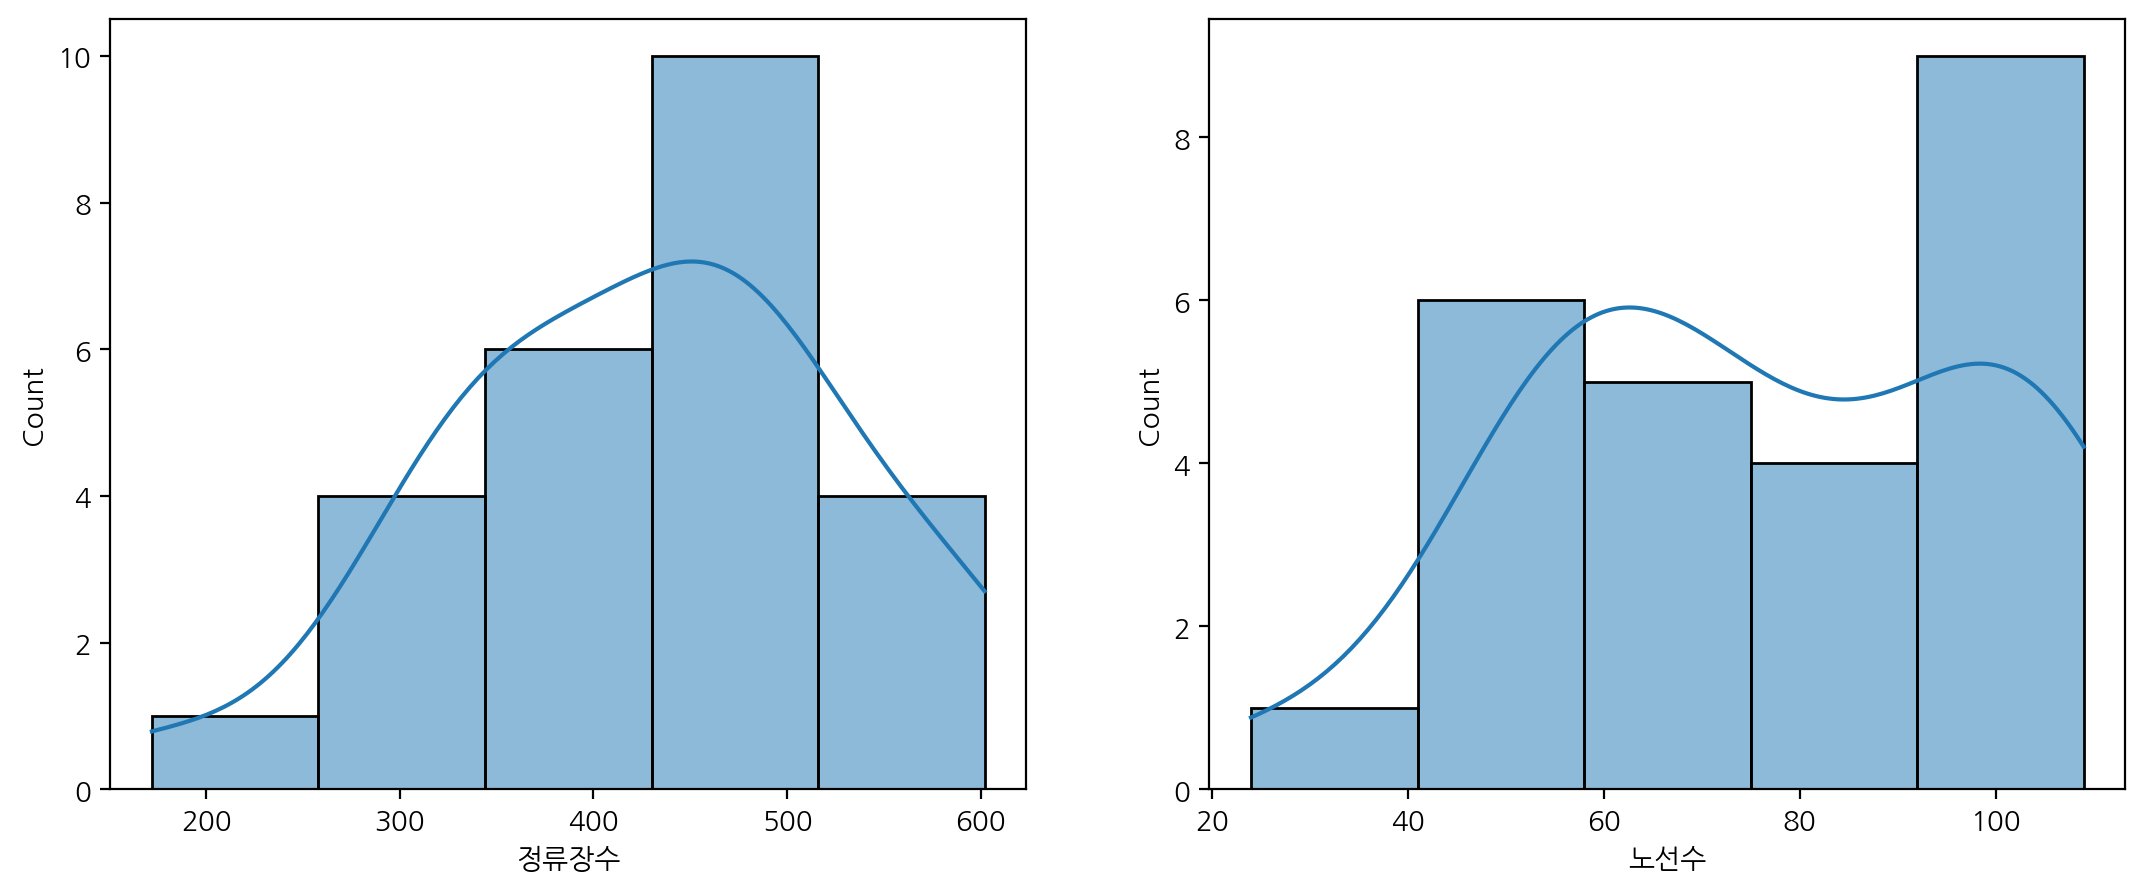

In [257]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.histplot(x=seoul_bus_station['정류장수'],kde=True, bins=5)

plt.subplot(1,2,2)
sns.histplot(x=seoul_bus_station['노선수'],kde=True, bins=5)
plt.show()

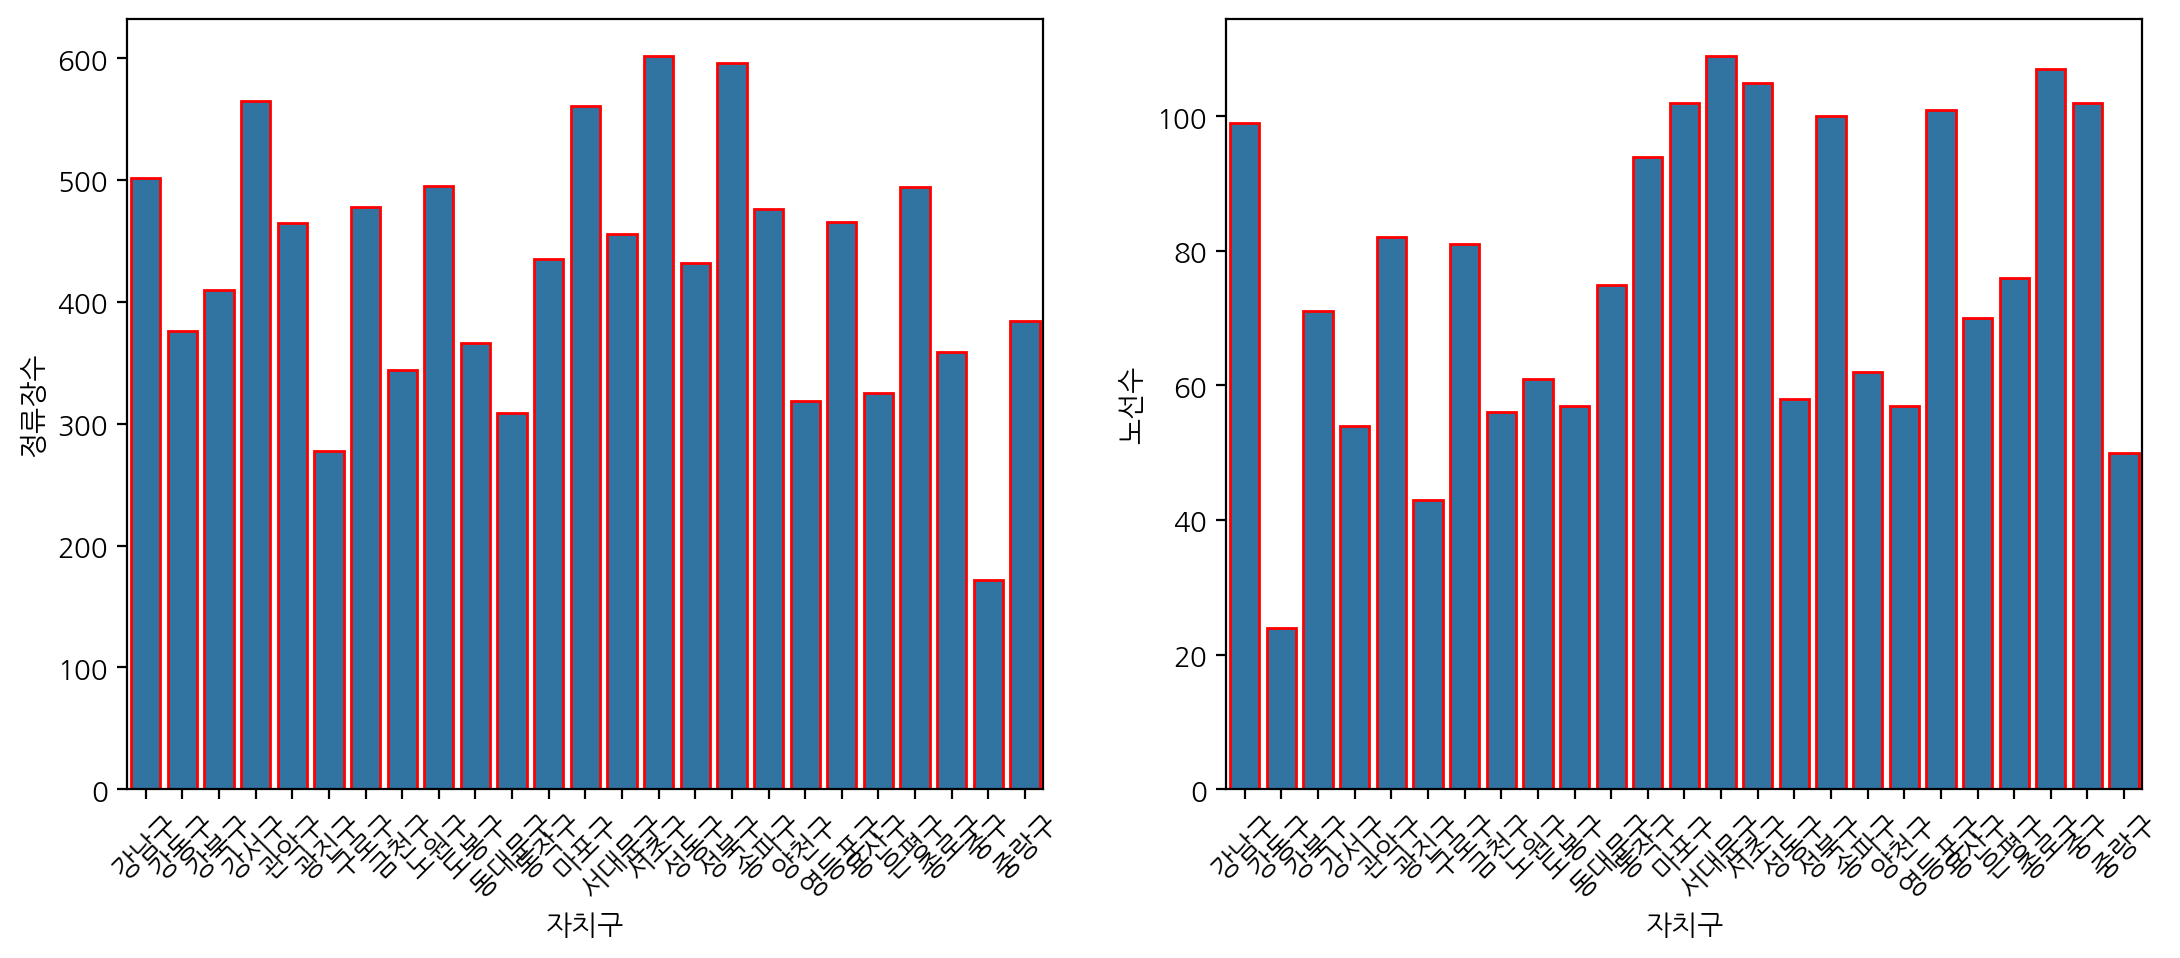

In [265]:
# 주석
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(x=seoul_bus_station['자치구'],y=seoul_bus_station['정류장수'],edgecolor='red')
plt.xticks(rotation=45)


plt.subplot(1,2,2)
sns.barplot(x=seoul_bus_station['자치구'],y=seoul_bus_station['노선수'],edgecolor='red')
plt.xticks(rotation=45)

plt.show()


In [180]:
# 주석
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
e_seoul_bus_station = seoul_bus_station.drop(labels='자치구',axis=1)
scaled_seoul_bus_station=minmax_scaler.fit_transform(e_seoul_bus_station)
scaled_seoul_bus_station = pd.DataFrame(scaled_seoul_bus_station)

scaled_seoul_bus_station.columns={'정류장수','노선수','승차총승객수','하차총승객수','승차평균승객수','하차평균승객수'}
scaled_seoul_bus_station

,정류장수,승차총승객수,승차평균승객수,하차총승객수,노선수,하차평균승객수
0,0.767442,0.882353,1.000000,1.000000,0.804542,0.669649
1,0.474419,0.000000,0.020483,0.019645,0.176587,0.154929
2,0.553488,0.552941,0.347389,0.352785,0.852274,0.752361
3,0.913953,0.352941,0.347419,0.378388,0.152847,0.152283
4,0.681395,0.682353,0.760153,0.856492,1.000000,1.000000
5,0.246512,0.223529,0.003806,0.017076,0.550297,0.544112
6,0.711628,0.670588,0.394828,0.397744,0.648897,0.559136
7,0.400000,0.376471,0.135791,0.127961,0.723815,0.624309
8,0.751163,0.435294,0.240278,0.254440,0.085124,0.074780
9,0.451163,0.388235,0.065883,0.065083,0.423601,0.376446


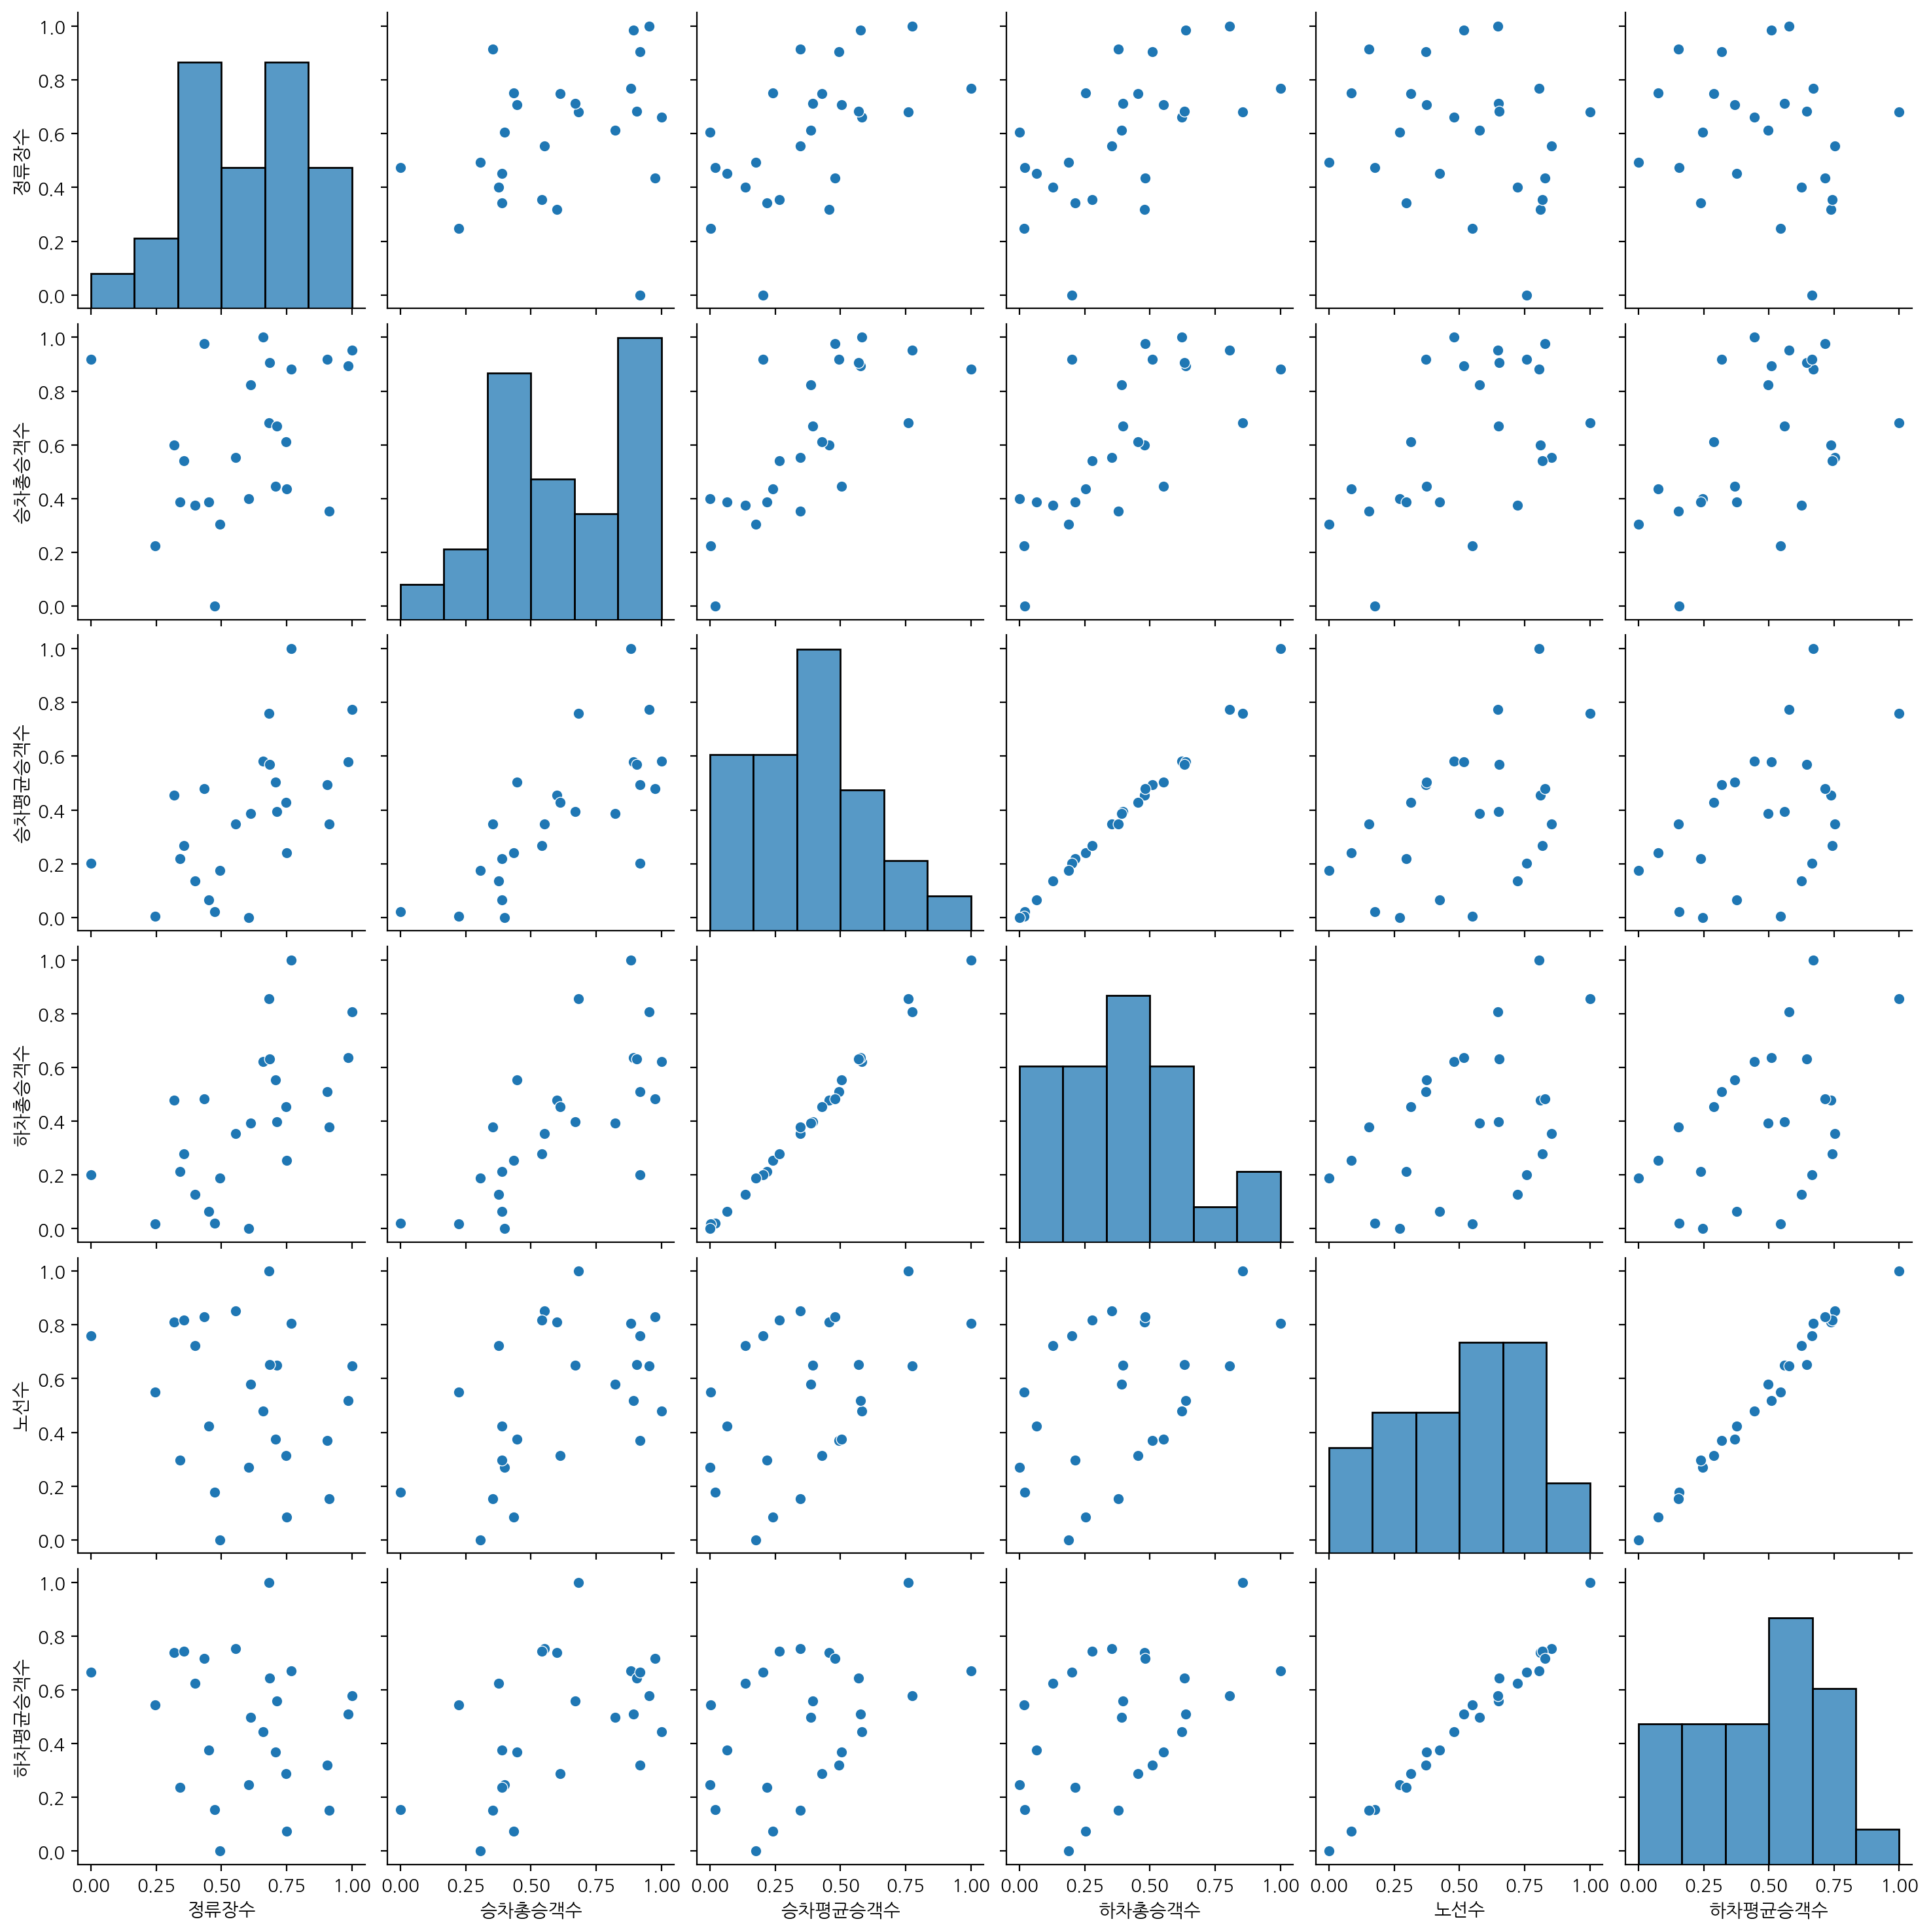

In [183]:
sns.pairplot(scaled_seoul_bus_station)
plt.show()

<Axes: xlabel='정류장수', ylabel='하차총승객수'>

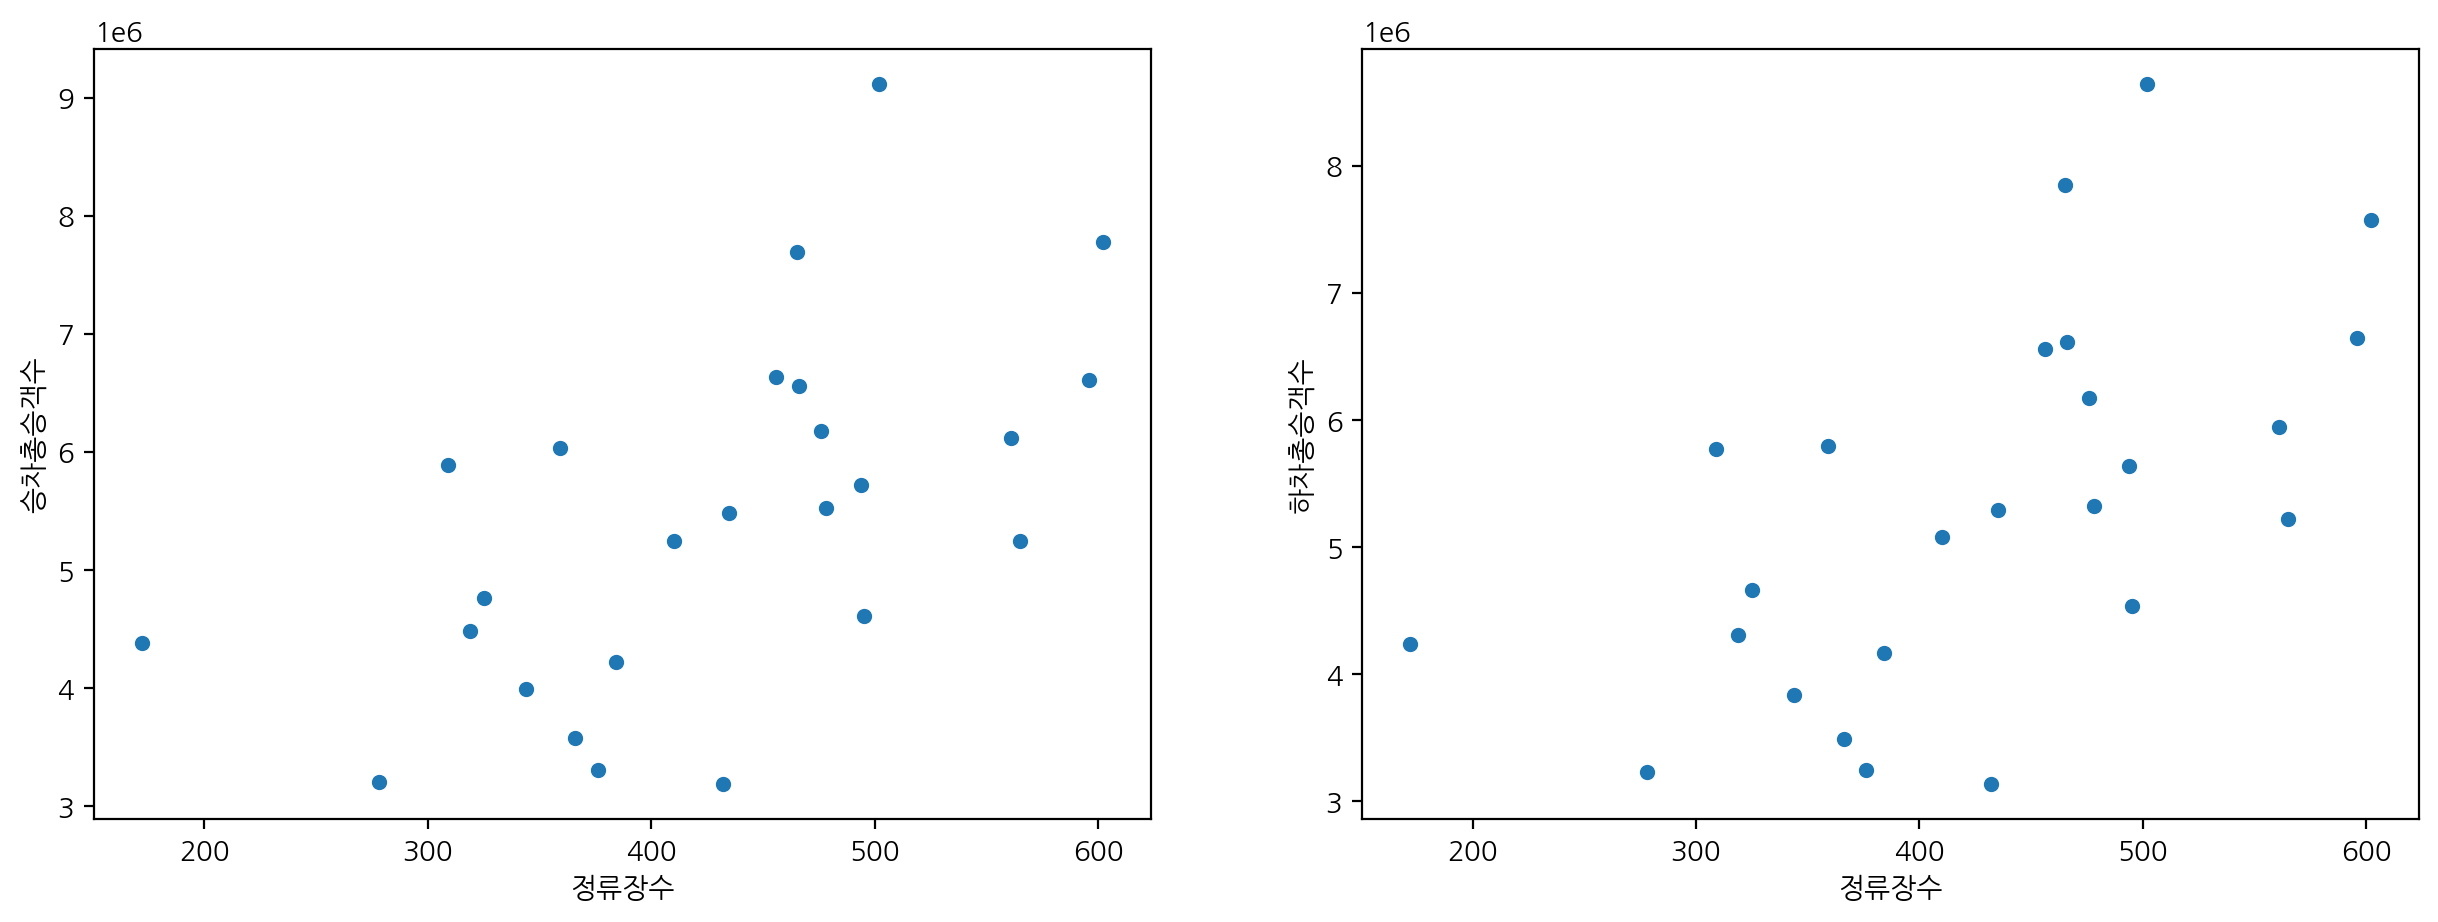

In [211]:
# 주석
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=seoul_bus_station['정류장수'],y=seoul_bus_station['승차총승객수'])

plt.subplot(1,2,2)
sns.scatterplot(x=seoul_bus_station['정류장수'],y=seoul_bus_station['하차총승객수'])




<Axes: xlabel='정류장수', ylabel='하차평균승객수'>

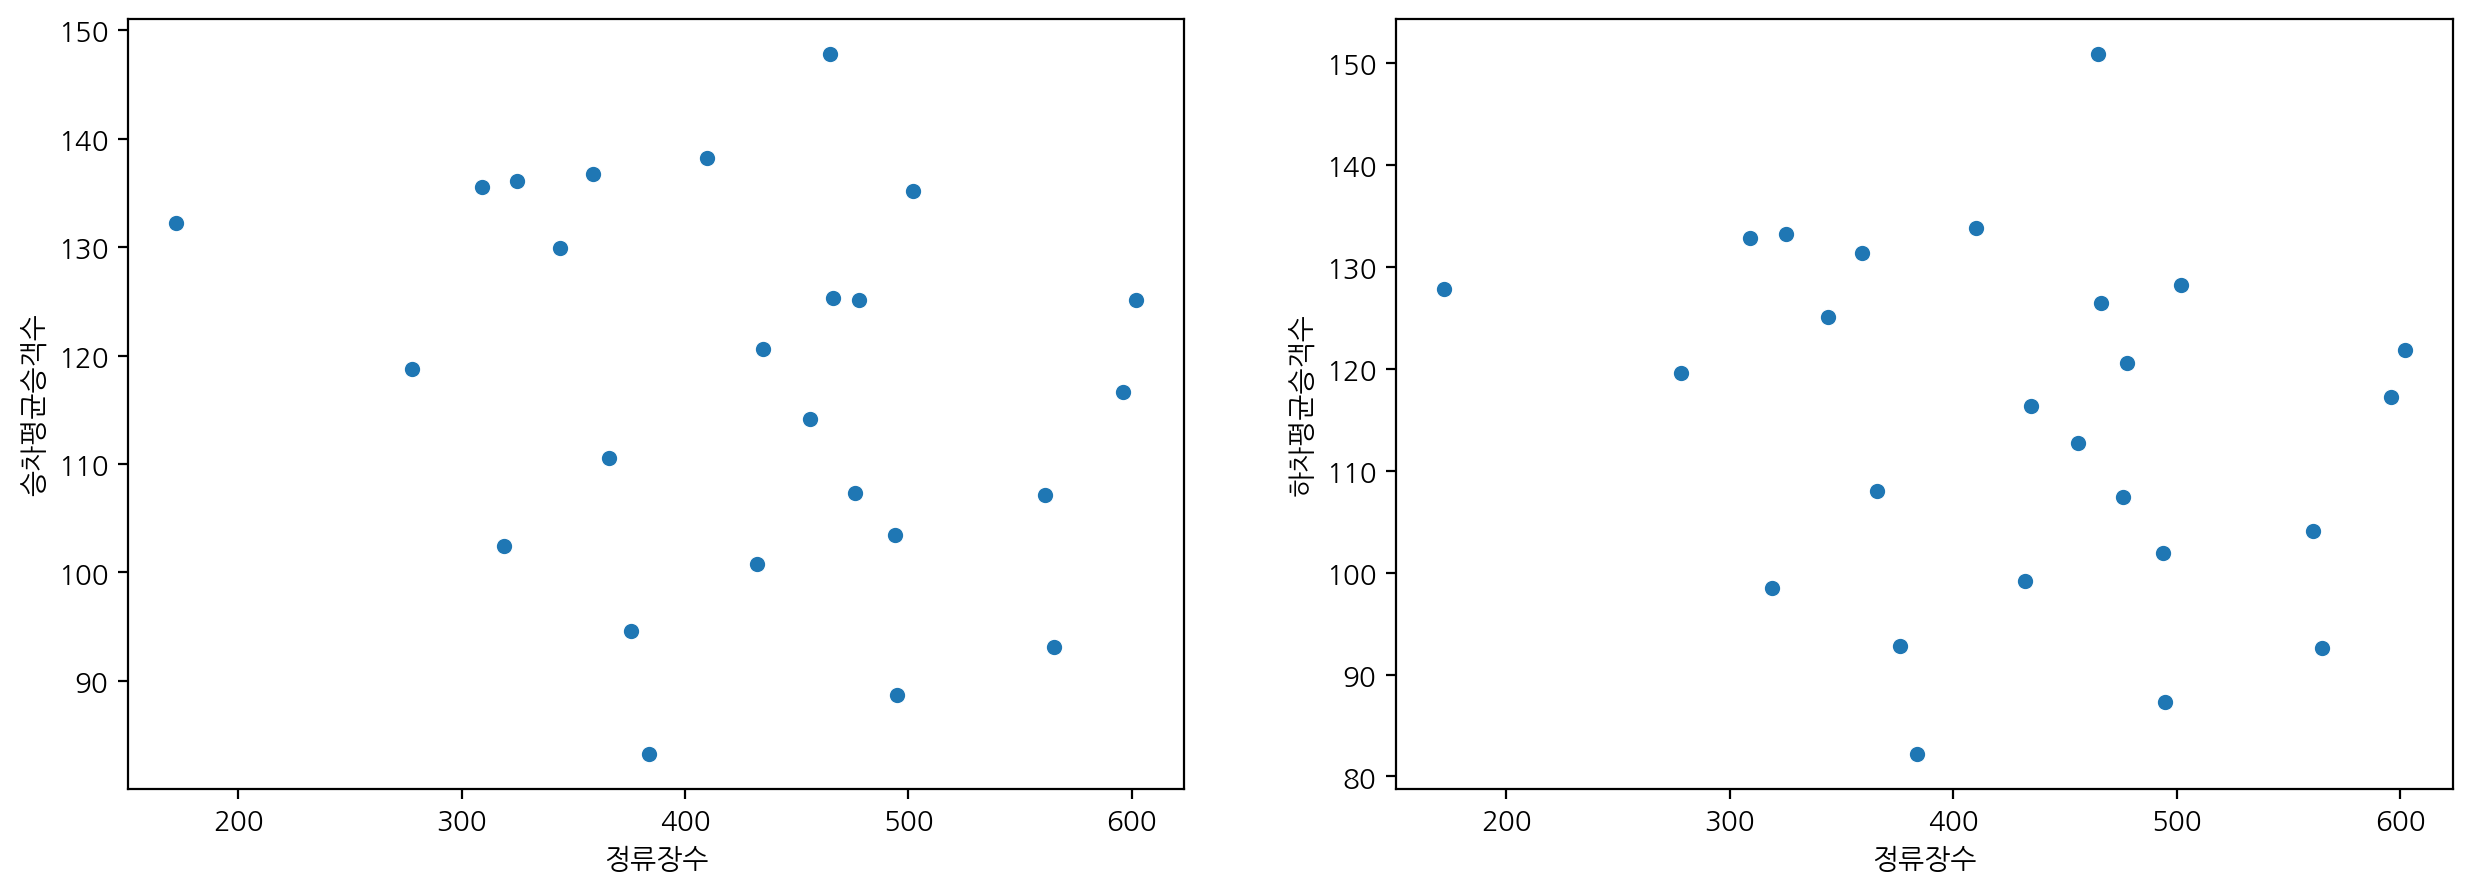

In [213]:
# 주석
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=seoul_bus_station['정류장수'],y=seoul_bus_station['승차평균승객수'])

plt.subplot(1,2,2)
sns.scatterplot(x=seoul_bus_station['정류장수'],y=seoul_bus_station['하차평균승객수'])

<Axes: xlabel='노선수', ylabel='하차총승객수'>

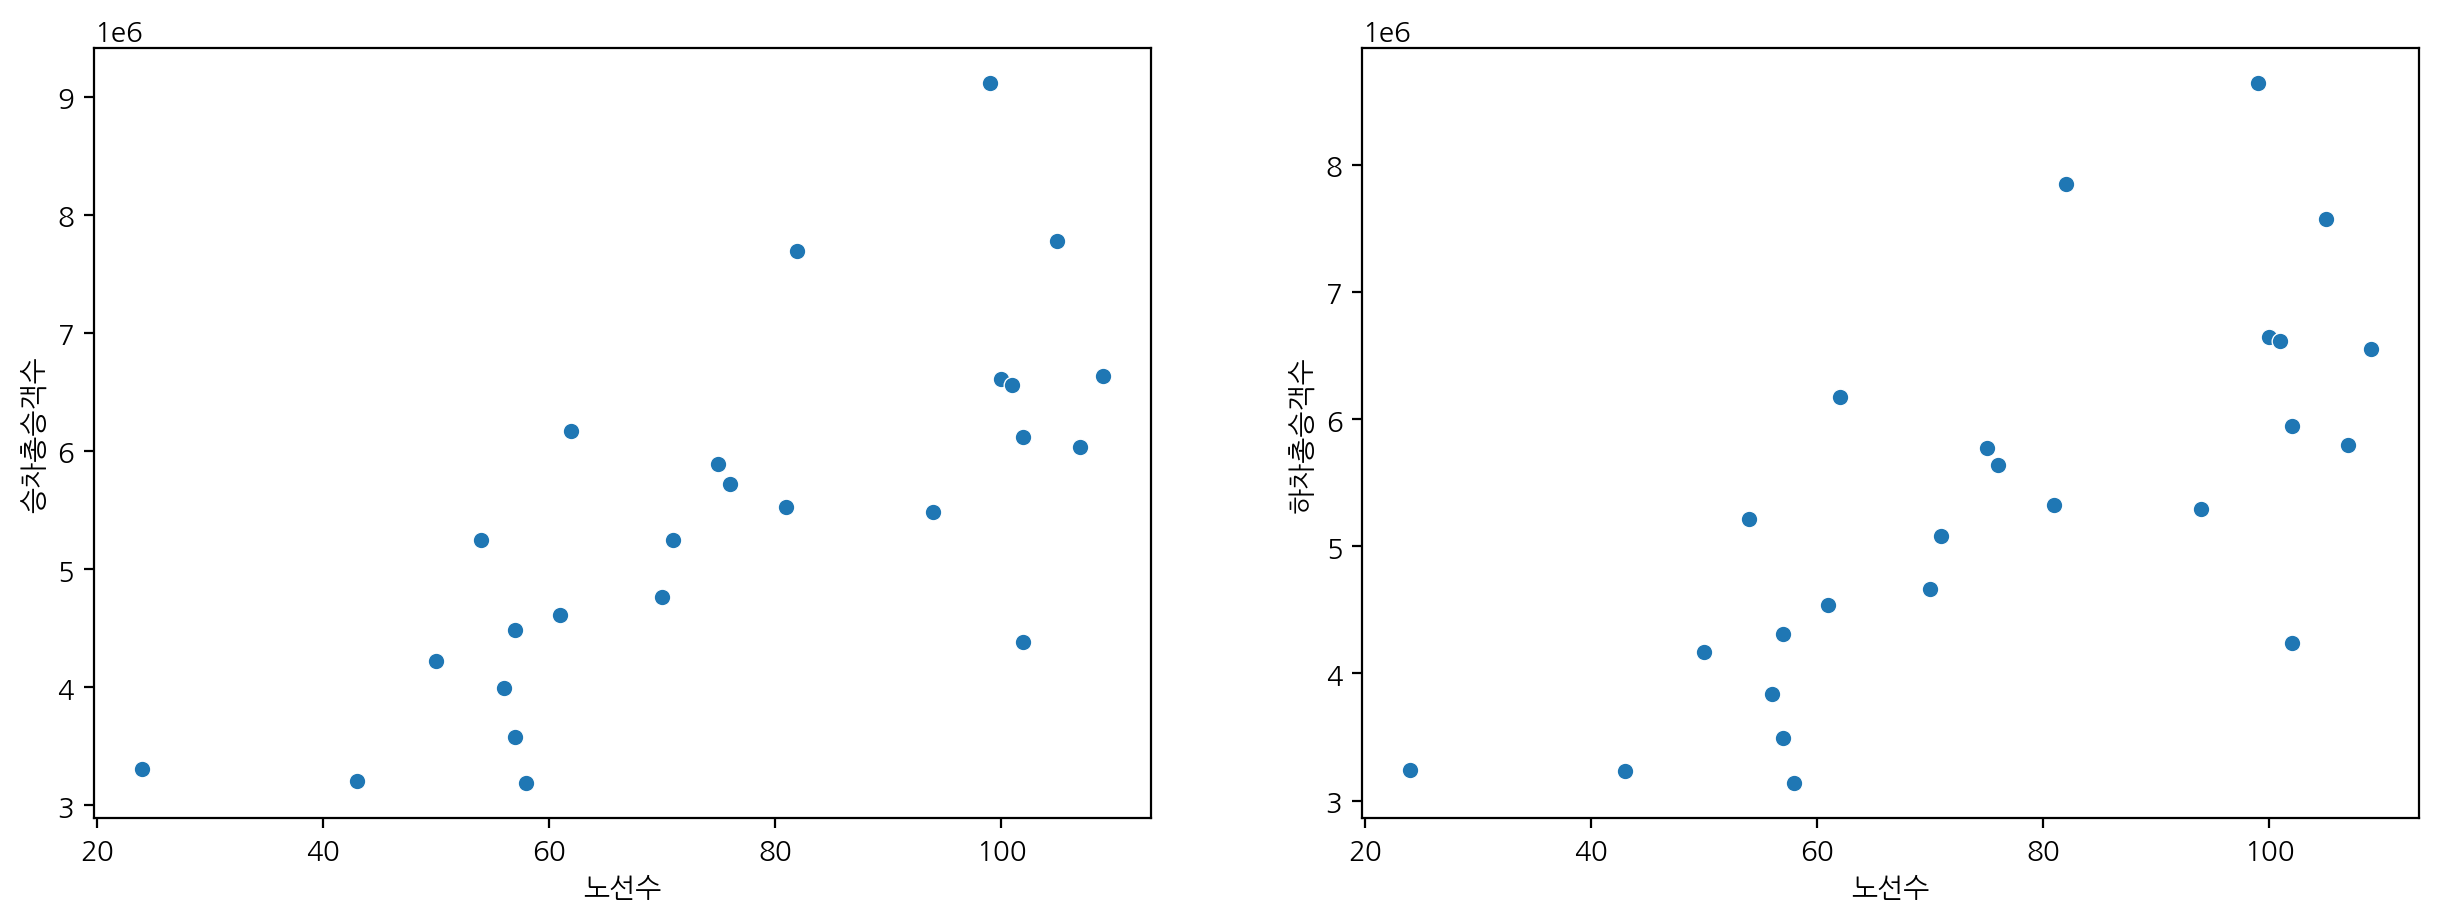

In [215]:
# 주석
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=seoul_bus_station['노선수'],y=seoul_bus_station['승차총승객수'])

plt.subplot(1,2,2)
sns.scatterplot(x=seoul_bus_station['노선수'],y=seoul_bus_station['하차총승객수'])


<Axes: xlabel='노선수', ylabel='하차평균승객수'>

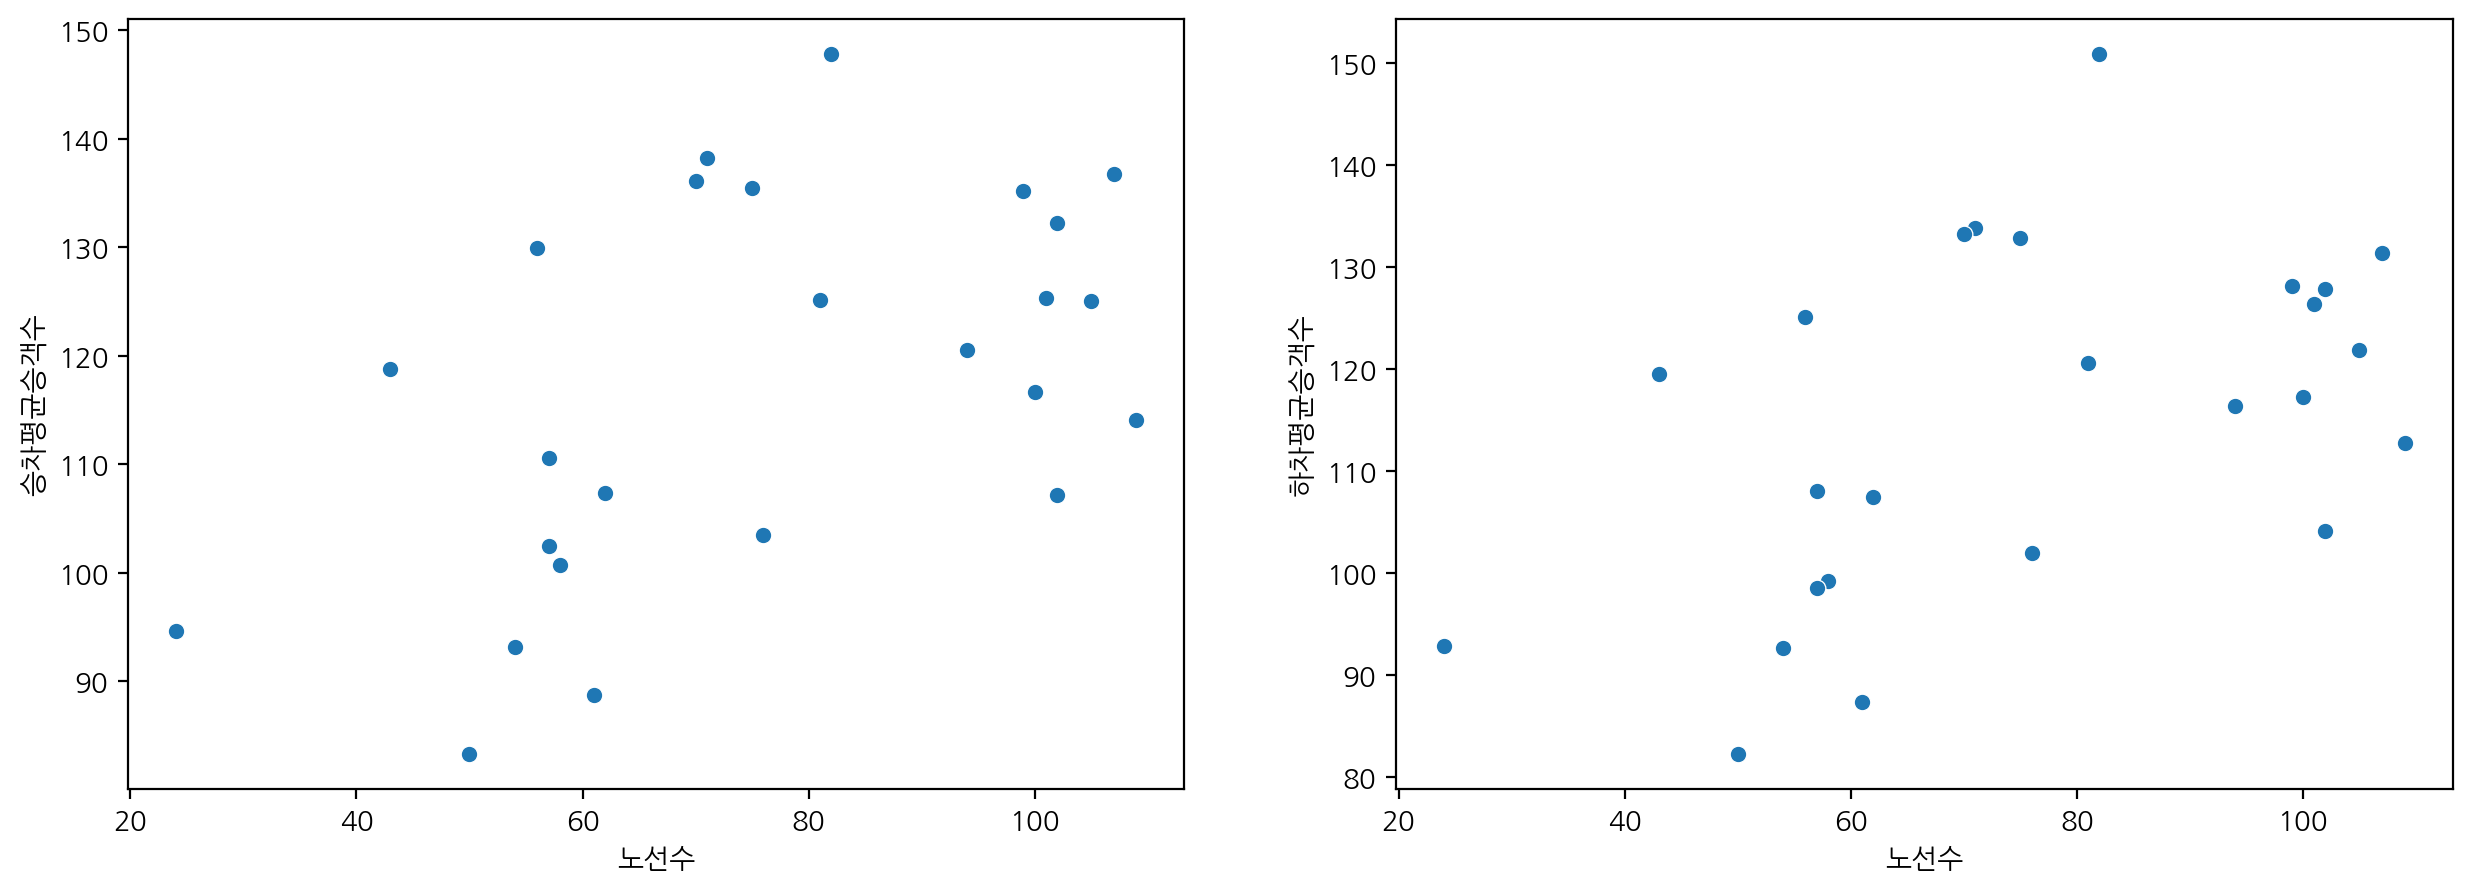

In [217]:
# 주석
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=seoul_bus_station['노선수'],y=seoul_bus_station['승차평균승객수'])

plt.subplot(1,2,2)
sns.scatterplot(x=seoul_bus_station['노선수'],y=seoul_bus_station['하차평균승객수'])


<Axes: xlabel='정류장수', ylabel='노선수'>

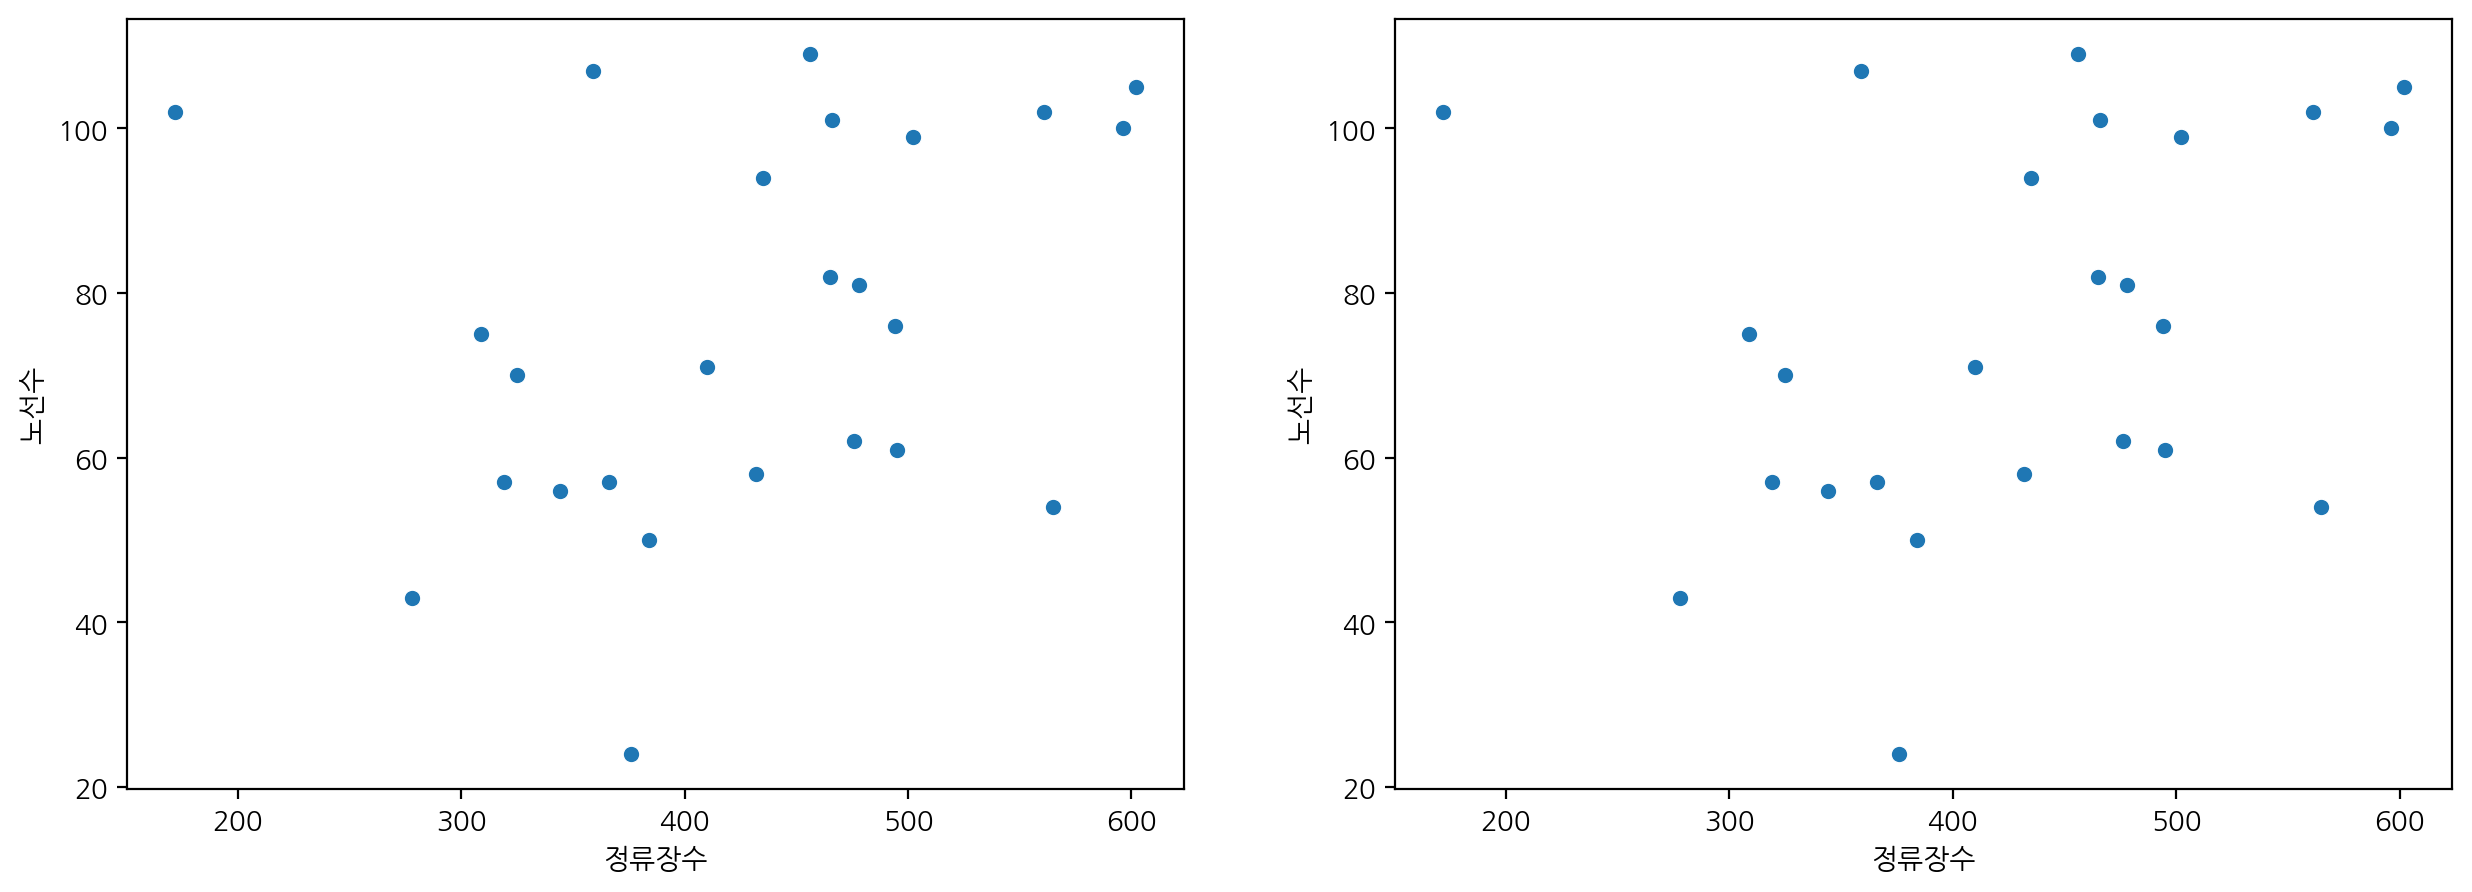

In [225]:
# 주석
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=seoul_bus_station['정류장수'],y=seoul_bus_station['노선수'])

plt.subplot(1,2,2)
sns.scatterplot(x=seoul_bus_station['정류장수'],y=seoul_bus_station['노선수'])

In [ ]:
# 위 시각화흫 통해 알게된 사실을 정리해 보세요.
1. 정류장수가 많아질수록 승차,하차 총 승객수가 증가하는 경향이 있다.
2. 정류장수에 따른 승차,하차 총 승객수는 같다(타면 내려야 하니까)
3. 노선수가 많아질수록 승차,하차 총 승객수가 증가하는 경향이 있다.
4. 노선수에 따른 승차,하차 총 승객수는 같다(타면 내려야 하니까)
5. 정류장수가 많은 자치구일수록 노선수 또한 많아지는 경향이 있다.
